
# London's underground resilience

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from networkx import algorithms 
from networkx.algorithms import efficiency
from networkx.algorithms import components
from networkx.algorithms.efficiency_measures import global_efficiency
from networkx.algorithms.components import connected_components

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

# Part1: London’s underground resilience

In this part, you will evaluate the resilience of the London’s underground through the removal of stations that can potentially make the underground vulnerable. Through the procedure outlined below you will investigate which are the stations that are most critical for the functioning of the underground, and which methodology is more appropriate to finding these stations.

Urban systems are made up of different infrastructure systems and cities are built on the premise that these systems are functioning properly. The metro is a key part of this system (Mike batty). In the event of an accidental attack on a station in the metro system or a man-made disaster, not only the station itself is affected, but also the entire metro causing cascading failures (new resilience). With the rapid development of network science, different centrality methods (Elsa) have been developed and applied to urban networks. This part of the study first investigates the importance of stations on the London Underground through three centrality methods. Next, two impact measures are selected to assess the impact of removing nodes on the resilience of the London Underground. Then, we will incorporate passenger flows into the Tube network. Finally, the measures are re-evaluated in the network and the most important nodes are removed to investigate their impact on passengers.


## I. Topological Network

In [3]:
# read the graphm file
#detel the xml becaues easy to read
G = nx.read_graphml('london.graph')

In [4]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [5]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [6]:
station_name = list(G.nodes)

In [7]:
for node in station_name:
    G.nodes[node]['station_name'] = node

In [8]:
# we can also add the stations name to the edge attributes from the nodes attributes:

nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

In [9]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483,
  'line_name': 'Jubilee',
  'flows': 12356,
  'station_1_': 'Wembley Park',
  'station_2_': 'Kingsbury'})

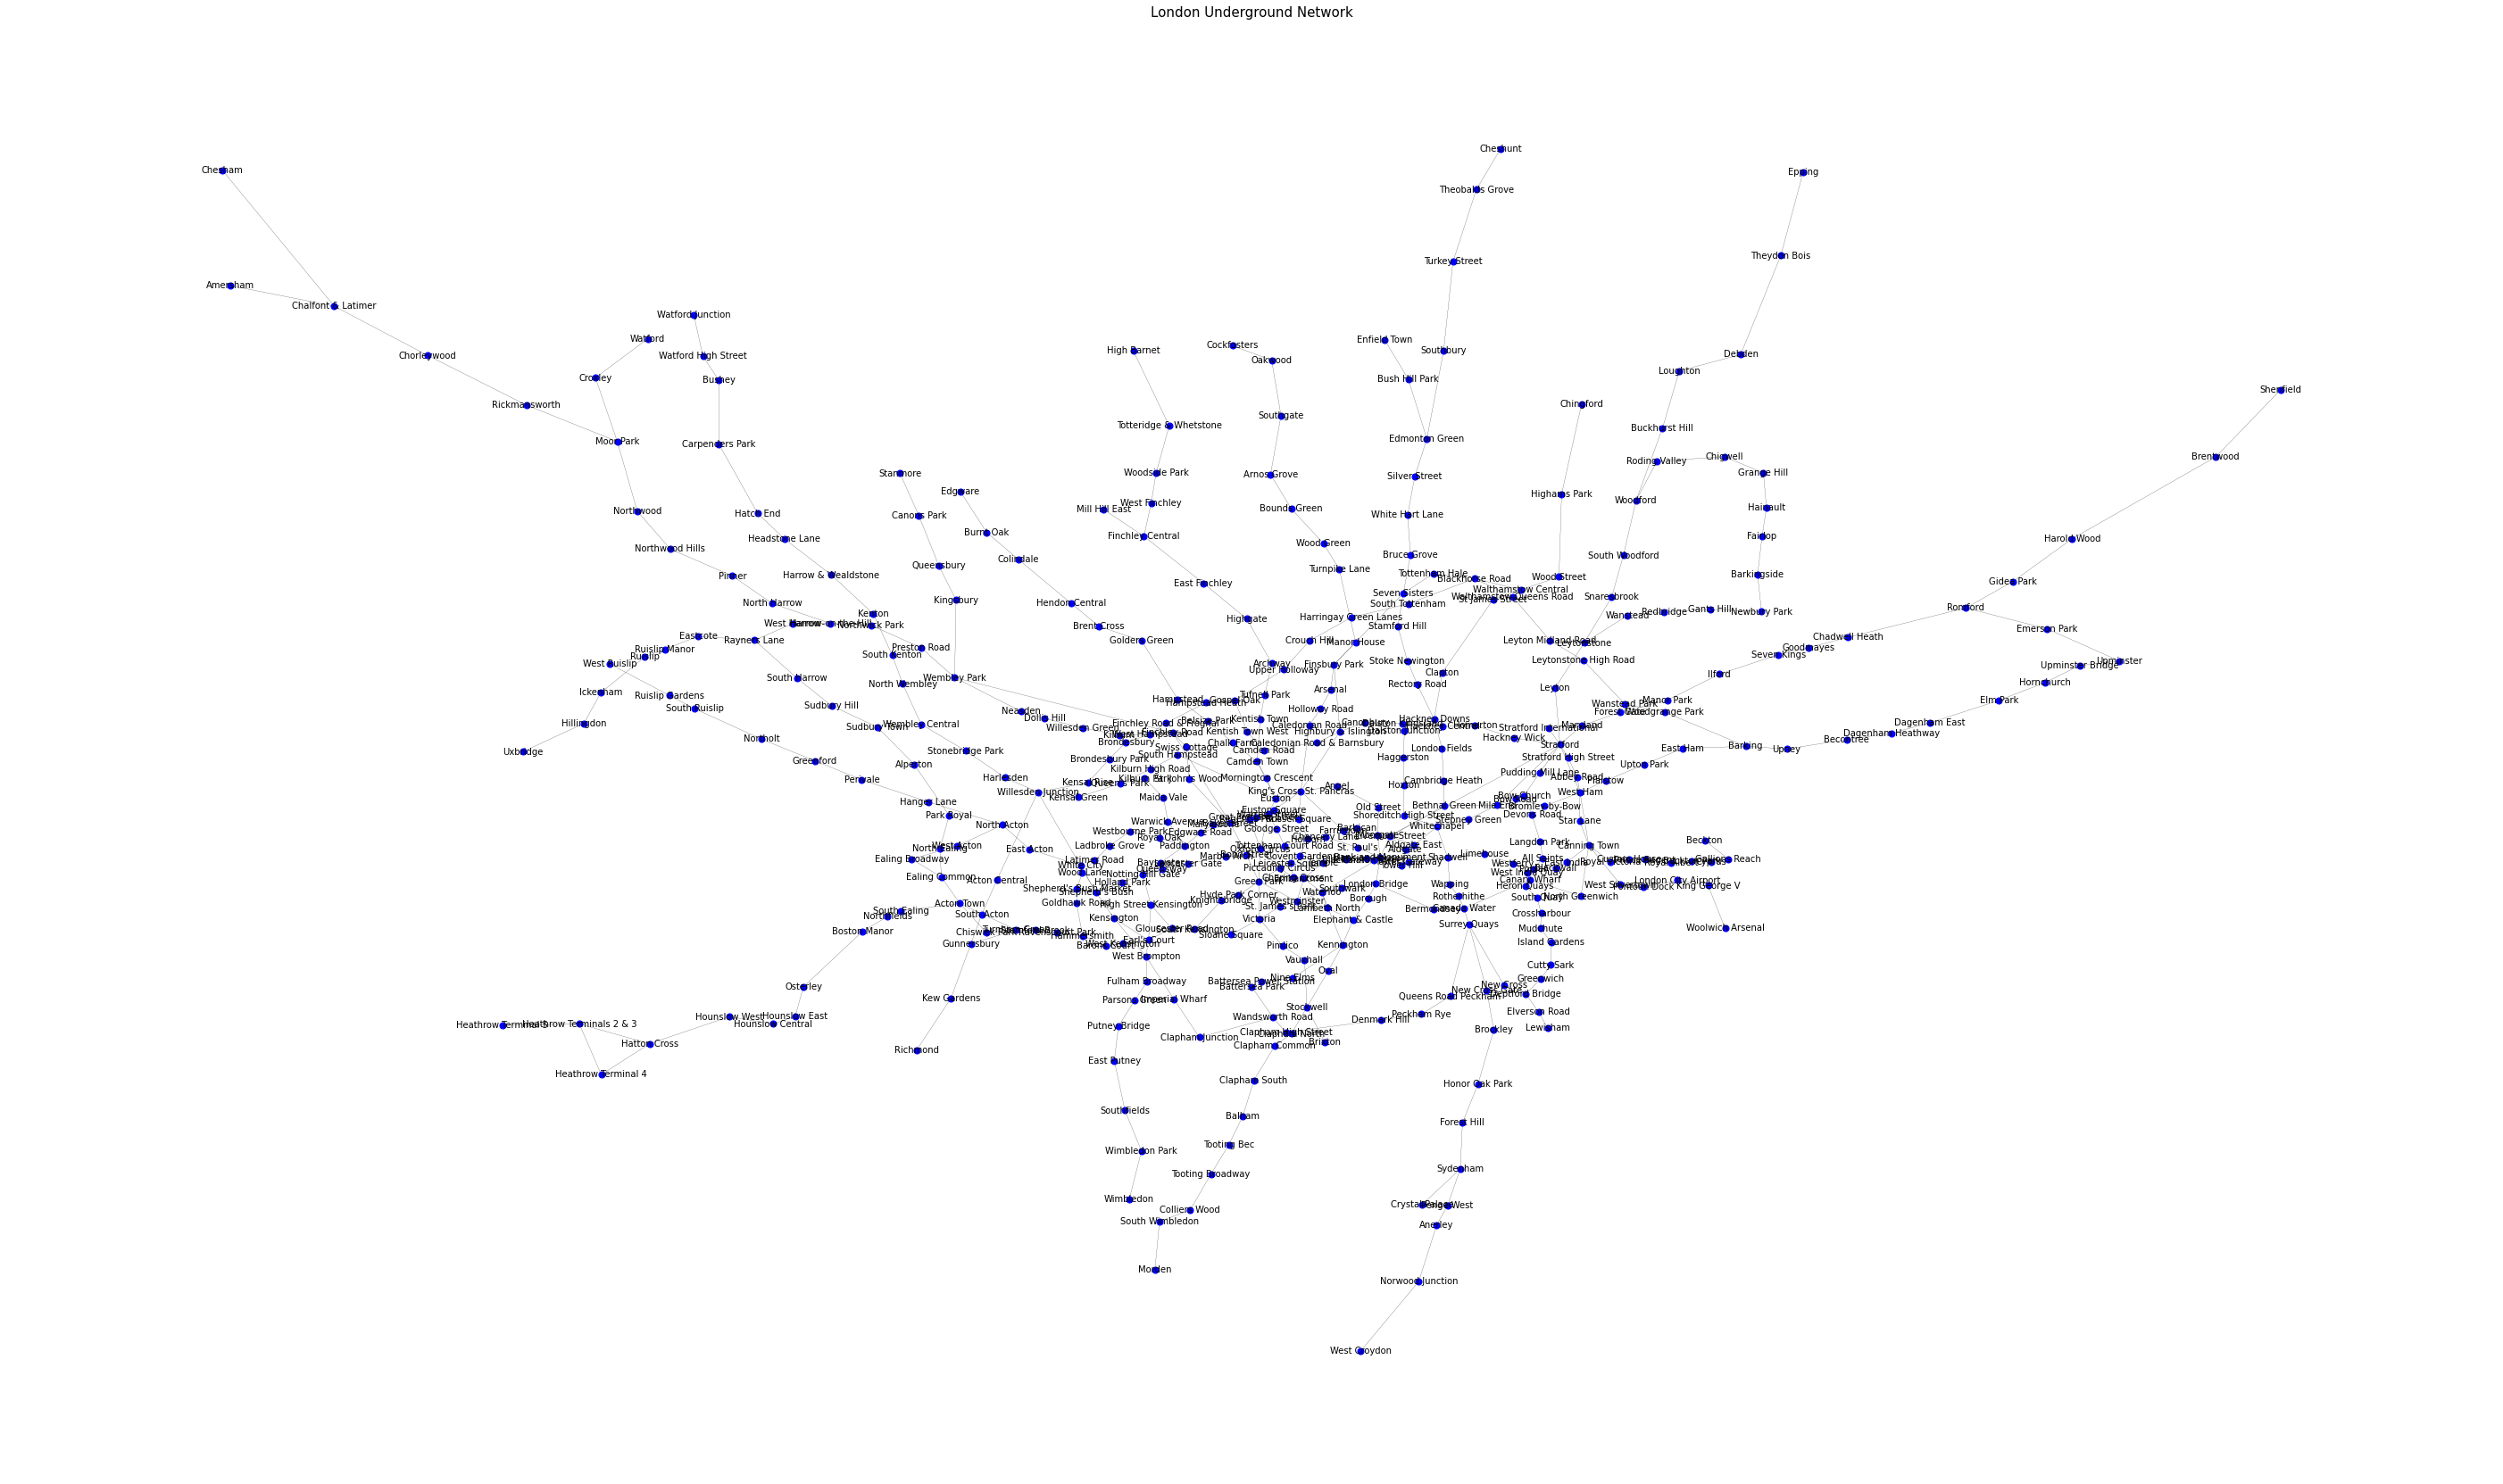

In [10]:
# plot the network
# we can plot the tube network with the name of stations
fig, ax = plt.subplots(figsize=(50,30))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London Underground Network",fontsize=15)
plt.axis("off")
plt.show()

In [11]:
 #check  dataframe from the graph 
df = nx.to_pandas_edgelist(G)
df.head()

,source,target,station_2_,station_1_,line_name,flows,length
0,Wembley Park,Kingsbury,Kingsbury,Wembley Park,Jubilee,12356,2916.771558
1,Wembley Park,Neasden,Neasden,Wembley Park,Jubilee,6744,2353.165938
2,Wembley Park,Preston Road,Preston Road,Wembley Park,Metropolitan,36601,1419.735166
3,Wembley Park,Finchley Road,Finchley Road,Wembley Park,Metropolitan,55216,7266.373927
4,Kingsbury,Queensbury,Queensbury,Kingsbury,Jubilee,9419,1245.995234


### I.1. Centrality measures

Select 3 centrality measures to characterise nodes, aiming at identifying the most important nodes in this particular network. In addition to giving their definitions, explain what do the measures mean into the context of the underground, and why they will allow you to find the stations that are most crucial for the functioning of the underground. Compute the measures for your nodes in the network, and give the results in a table for the first 10 ranked nodes for each of the 3 measures. (9 marks, 3 per measure)

在网络分析中， 中心性的想法是识别图中的重要顶点(图论)。因此，针对研究伦敦地铁网络的特性，可以将每个站点作为网络中节点，车站之间的路线为边，车站距离作为边的属性，来构建伦敦地铁的拓扑网络。使用三种中心性的测量方法包括：度中心性、betweeness 中心性和Closeness Centrality，反映站点不同程度的重要性，以构建识别重要站点的综合评价标准（）。

In this section we will be looking for the top 10 points


   * max_1: Top10 based on non-sequentially Degree Centrality value
   * max_2: Top10 based on non-sequentially Betweenness Centrality value
   * max_3: Top10 based on non-sequentially Closeness Centrality value
   * max_4: Top10 based on sequentially Degree Centrality value
   * max_5: Top10 based on sequentially Betweenness Centrality value
   * max_6: Top10 based on sequentially Closeness Centrality value

#### Degree Centrality of the node(non-sequentially)--max_1

In [12]:
degree_centrality=nx.degree(G)
nx.set_node_attributes(G,dict(degree_centrality),'degree_centrality')

In [13]:
# max_1
degree_centrality_df=pd.DataFrame.from_dict(dict(degree_centrality),columns=['degree_centrality'],orient='index')
node1=list(degree_centrality_df.sort_values('degree_centrality',axis = 0,ascending = False).index)
max_1=node1[0:10]

degree_centrality_df.sort_values('degree_centrality',axis = 0,ascending = False)[0:10]


,degree_centrality
Stratford,9
Bank and Monument,8
King's Cross St. Pancras,7
Baker Street,7
Earl's Court,6
Oxford Circus,6
Liverpool Street,6
Waterloo,6
Green Park,6
Canning Town,6


In [14]:
#max_4
max_4=[]
g_4=G.copy()
for i in range(0,10):
    degree_centrality=nx.degree_centrality(g_4)
    nx.set_node_attributes(g_4,dict(degree_centrality),'degree_centralit')
    degree_df=pd.DataFrame.from_dict(dict(degree_centrality),columns=['degree_centrality'],orient='index')
    node4=list(degree_df.sort_values('degree_centrality',axis = 0,ascending = False).index)
    max_4.append(node4[0])
    g_4.remove_nodes_from([node4[0]])
max_4

['Stratford',
 'Bank and Monument',
 'Baker Street',
 "King's Cross St. Pancras",
 "Earl's Court",
 'Green Park',
 'Canning Town',
 'Willesden Junction',
 'Turnham Green',
 'Oxford Circus']

#### Betweenness Centrality value(non-sequentially&sequentially)___max2&max5

In [15]:
betweenness_centrality=nx.betweenness_centrality(G, normalized=False)
# add these values to the nodes attributes:
nx.set_node_attributes(G,betweenness_centrality,'betweenness_centrality')

In [16]:

betweenness_df=pd.DataFrame.from_dict(betweenness_centrality,columns=['betweenness_centrality'],orient='index')
max_2=list(betweenness_df.sort_values('betweenness_centrality',axis = 0,ascending = False).index)[0:10]

betweenness_df.sort_values('betweenness_centrality',axis = 0,ascending = False)
max_2

['Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

In [17]:
# max5

max_5=[]
g_5=G.copy()

for i in range(0,10):
    # recalculate the centrality values and remove the most largest one
    betweenness_centrality=nx.betweenness_centrality(g_5, normalized=False)
    nx.set_node_attributes(g_5,betweenness_centrality,'betweenness_centrality')
    betweenness_df=pd.DataFrame.from_dict(betweenness_centrality,columns=['betweenness_centrality'],orient='index')
    node5=list(betweenness_df.sort_values('betweenness_centrality',axis = 0,ascending = False).index)
    max_5.append(node5[0])
    g_5.remove_nodes_from([node5[0]])

max_5

['Stratford',
 "King's Cross St. Pancras",
 'Waterloo',
 'Bank and Monument',
 'Canada Water',
 'West Hampstead',
 "Earl's Court",
 "Shepherd's Bush",
 'Euston',
 'Baker Street']

#### Closeness Centrality (non-sequentially&sequentially)___max3&max6

In [18]:
closeness_centrality=nx.closeness_centrality(G)
nx.set_node_attributes(G,closeness_centrality,'closeness_centrality')

In [19]:
# max_3
closeness_centrality_df=pd.DataFrame.from_dict(closeness_centrality,columns=['closeness_centrality'],orient='index')
max_3=list(closeness_centrality_df.sort_values('closeness_centrality',axis = 0,ascending = False).index)[0:10]

closeness_centrality_df.sort_values('closeness_centrality',axis = 0,ascending = False)
max_3

['Green Park',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Westminster',
 'Waterloo',
 'Oxford Circus',
 'Bond Street',
 'Farringdon',
 'Angel',
 'Moorgate']

In [20]:
# max_6
max_6=[]
g_6=G.copy()
for i in range(0,10):
    closeness_centrality=nx.closeness_centrality(g_6)
    nx.set_node_attributes(g_6,closeness_centrality,'closeness_t')
    closeness_df=pd.DataFrame.from_dict(closeness_centrality,columns=['closeness_centrality'],orient='index')
    node6=list(closeness_df.sort_values('closeness_centrality',axis = 0,ascending = False).index)
    max_6.append(node6[0])
    g_6.remove_nodes_from([node6[0]])
max_6

['Green Park',
 "King's Cross St. Pancras",
 'Waterloo',
 'Bank and Monument',
 'West Hampstead',
 'Canada Water',
 'Stratford',
 "Earl's Court",
 "Shepherd's Bush",
 'Oxford Circus']

# the important nodes

merge the 6 result in the dataframe

In [21]:
#create a df to store the results of top ten important stations of London underground system
top_node=pd.DataFrame(index=range(0,10),columns=['Degree(non-seq)','Betweenness(non-seq)','Closeness(non-seq)','Degree(seq)','Betweenness(seq)','Closeness(seq)'])

In [22]:
columns=['Degree(non-seq)','Betweenness(non-seq)','Closeness(non-seq)','Degree(seq)','Betweenness(seq)','Closeness(seq)']
max_all=[max_1,max_2,max_3,max_4,max_5,max_6]
for i in range(0,6):
    for j in range(0,10):
        top_node[columns[i]][j]=G.nodes[max_all[i][j]]['station_name']
top_node.insert(0,'Rank',range(1,11))

In [23]:
top_node

,Rank,Degree(non-seq),Betweenness(non-seq),Closeness(non-seq),Degree(seq),Betweenness(seq),Closeness(seq)
0,1,Stratford,Stratford,Green Park,Stratford,Stratford,Green Park
1,2,Bank and Monument,Bank and Monument,Bank and Monument,Bank and Monument,King's Cross St. Pancras,King's Cross St. Pancras
2,3,King's Cross St. Pancras,Liverpool Street,King's Cross St. Pancras,Baker Street,Waterloo,Waterloo
3,4,Baker Street,King's Cross St. Pancras,Westminster,King's Cross St. Pancras,Bank and Monument,Bank and Monument
4,5,Earl's Court,Waterloo,Waterloo,Earl's Court,Canada Water,West Hampstead
5,6,Oxford Circus,Green Park,Oxford Circus,Green Park,West Hampstead,Canada Water
6,7,Liverpool Street,Euston,Bond Street,Canning Town,Earl's Court,Stratford
7,8,Waterloo,Westminster,Farringdon,Willesden Junction,Shepherd's Bush,Earl's Court
8,9,Green Park,Baker Street,Angel,Turnham Green,Euston,Shepherd's Bush
9,10,Canning Town,Finchley Road,Moorgate,Oxford Circus,Baker Street,Oxford Circus


### 1.3 Node removal:

For each of the centrality measures selected in 1.- remove at least 10 nodes following two different strategies. A) non-sequential removal: using your table in 1.- remove 1 node at a time following the rank in the table, i.e. from the most important one to the 10th most important one. After each removal, evaluate the impact of the removal using your two measures in 2.-, and proceed until you have removed at least 10 nodes. B) sequential: remove the highest ranked node and evaluate the impact using the 2 measures. After removal, re-compute the centrality measure. Remove the highest ranked node in the new network and evaluate the impact. Continue until removing at least two nodes. Report the results of the 2 strategies in one plot, and critically discuss the following: which centrality measure reflects better the importance of a station for the functioning of the underground, which strategy is more effective at studying resilience, and which impact measure is better at assessing the damage after node removal.

We will remove points in 6 different ways and calculate the score of the whole network after each way of removing points.

* Non-sequential:
    * max 1: Remove nodes with the most largest  Degree Centrality value, where the remove sequence is the original order
    * max 2: Remove nodes with the most largest Betweenness Centrality value, where the remove sequence is the original order
    * max 3: Remove nodes with the most largest Closeness Centrality value, where the remove sequence is the original order
* Sequential:
    * max 4: Remove nodes with the most largest Degree Centrality value, and the value will be recomputed after every removal
    * max 5: Remove nodes with the most largest Betweenness Centrality value, and the value will be recomputed after every removal
    * max 6: Remove nodes with the most largest Closeness Centrality value, and the value will be recomputed after every removal

After every removal, I will use two measures to evaluate the perfomance of the network after nodes removal, and store the values into lists. Therefore, there will be 12 lists in total, and I name them ``clustering_1``(the  __clustering coefficient__ in scenario 1), ``global_1``(__global_efficent__), ``clustering_2``, ``global_2``...

### Non-sequential

### max_1 Degree Centrality (non-sequence)

In [24]:
# create a list that contain the node's coordinations by order
degree_centrality=nx.degree_centrality(G)
degree_df=pd.DataFrame.from_dict(dict(degree_centrality),columns=['degree_centrality'],orient='index')
node1=list(degree_df.sort_values('degree_centrality',axis = 0,ascending = False).index)
#create a list to store the score after every time remova
clustering_1=[]
global_1=[]
g_1=G.copy()
#remove the node one by one, after every removel, calculate the score
for i in range(0,len(list(G.nodes))):
    clustering_1.append(nx.average_clustering(g_1))
    global_1.append(global_efficiency(g_1))
    g_1.remove_nodes_from([node1[i]])

## max 2 Betweenness Centrality (non-sequence)

In [25]:
# create a list that contain the node's coordinations by order
bet_london_t=nx.betweenness_centrality(G, normalized=False)
betweenness_df=pd.DataFrame.from_dict(bet_london_t,columns=['betweenness_t'],orient='index')
node2=list(betweenness_df.sort_values('betweenness_t',axis = 0,ascending = False).index)

#create a list to store the score after every time removal
clustering_2=[]
global_2=[]
g_2=G.copy()

#remove the node one by one, after every removel, calculate the score
for i in range(0,len(list(G.nodes))):
    clustering_2.append(nx.average_clustering(g_2))
    global_2.append(global_efficiency(g_2))
    g_2.remove_nodes_from([node2[i]])

### max 3  Closeness Centrality (non-sequence)

In [26]:
# same lol!
closeness_t=nx.closeness_centrality(G)
closeness_df=pd.DataFrame.from_dict(closeness_t,columns=['closeness_t'],orient='index')
node3=list(closeness_df.sort_values('closeness_t',axis = 0,ascending = False).index)
clustering_3=[]
global_3=[]
g_3=G.copy()
for i in range(0,len(list(G.nodes))):
    clustering_3.append(nx.average_clustering(g_3))
    global_3.append(global_efficiency(g_3))
    g_3.remove_nodes_from([node3[i]])

### max 4 Degree Centrality (sequence)

In [27]:
#create a list to acqurie the result after removal the node
clustering_4=[]
global_4=[]
g_4=G.copy()
for i in range(0,len(list(G.nodes))):
    clustering_4.append(nx.average_clustering(g_4))
    global_4.append(global_efficiency(g_4))
    degree_centrality=nx.degree_centrality(g_4)
    nx.set_node_attributes(g_4,dict(degree_centrality),'degree_centrality')
    degree_df=pd.DataFrame.from_dict(dict(degree_centrality),columns=['degree_centrality'],orient='index')
    node4=list(degree_df.sort_values('degree_centrality',axis = 0,ascending = False).index)
    g_4.remove_nodes_from([node4[0]])

### max 5 Betweenness Centrality(sequence)

In [28]:
#create a list to store the score after every time removal
clustering_5=[]
global_5=[]
g_5=G.copy()

#remove the node one by one, after every removel, calculate the score and recalculate the centrality value
for i in range(0,len(list(G.nodes))):
    clustering_5.append(nx.average_clustering(g_5))
    global_5.append(global_efficiency(g_5))
    # recalculate the centrality values and remove the most largest one
    bet_london_t=nx.betweenness_centrality(g_5, normalized=False)
    nx.set_node_attributes(g_5,bet_london_t,'betweenness_t')
    betweenness_df=pd.DataFrame.from_dict(bet_london_t,columns=['betweenness_t'],orient='index')
    node5=list(betweenness_df.sort_values('betweenness_t',axis = 0,ascending = False).index)
    g_5.remove_nodes_from([node5[0]])

### max 6 Closeness Centrality(sequence)

In [29]:
# do the same in scenario 5
clustering_6=[]
global_6=[]
g_6=G.copy()
for i in range(0,len(list(G.nodes))):
    clustering_6.append(nx.average_clustering(g_6))
    global_6.append(global_efficiency(g_6))
    closeness_t=nx.closeness_centrality(g_6)
    nx.set_node_attributes(g_6,closeness_t,'closeness_t')
    closeness_df=pd.DataFrame.from_dict(closeness_t,columns=['closeness_t'],orient='index')
    node6=list(closeness_df.sort_values('closeness_t',axis = 0,ascending = False).index)
    g_6.remove_nodes_from([node6[0]])

# Normaized and plot the nodes removal of different centrality

In [30]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [31]:
#check the max value
print('The initial network\'s average clustering is '+ str(clustering_6[0]))
print('The initial network\'s global efficency is '+ str(global_5[0]))

The initial network's average clustering is 0.030382377389858693
The initial network's global efficency is 0.1012561935972123


The aim of this study is to focus on the change after removal, so normalising the results gives a clearer picture of the pattern after the change.

In [32]:
clustering_1 = NormalizeData(clustering_1[0:100])
clustering_2 = NormalizeData(clustering_2[0:100])
clustering_3 = NormalizeData(clustering_3[0:100])
clustering_4 = NormalizeData(clustering_4[0:100])
clustering_5 = NormalizeData(clustering_5[0:100])
clustering_6 = NormalizeData(clustering_6[0:100])

In [33]:
global_1 =  NormalizeData(global_1[0:50])
global_2 =  NormalizeData(global_2[0:50])
global_3 =  NormalizeData(global_3[0:50])
global_4 =  NormalizeData(global_4[0:50])
global_5 =  NormalizeData(global_5[0:50])
global_6 =  NormalizeData(global_6[0:50])

In [34]:
import numpy as np
import matplotlib.pyplot as plt


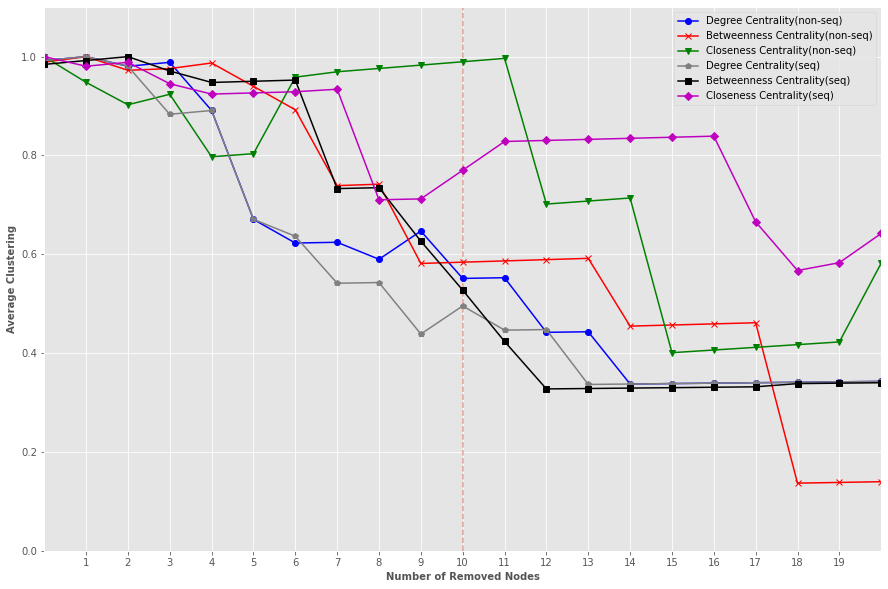

In [50]:
plt.style.use('ggplot')
plt.subplots(figsize=(15,10))
#plt.title('Score after Point Removal(average clustering)',fontsize=20,)
plt.xlabel('Number of Removed Nodes',weight="bold",fontsize=10)
plt.ylabel('Average Clustering',weight="bold",fontsize=10)
plt.xticks(range(1,20))
x=range(0,100)
plt.xlim(xmax=20,xmin=0)
plt.ylim(ymax=1.1,ymin=0)
plt.axvline(x=10,ls = '--',alpha=0.5)
plt.plot(x, clustering_1,'o-', color='blue',label='Degree Centrality(non-seq)')
plt.plot(x, clustering_2,'x-', color='red',label='Betweenness Centrality(non-seq)')
plt.plot(x, clustering_3,'v-', color='green',label='Closeness Centrality(non-seq)')
plt.plot(x, clustering_4,'p-', color='grey',label='Degree Centrality(seq)')
plt.plot(x, clustering_5,'s-', color='k',label='Betweenness Centrality(seq)')
plt.plot(x, clustering_6,'D-', color='m',label='Closeness Centrality(seq)')
plt.legend(loc=1)
plt.show()

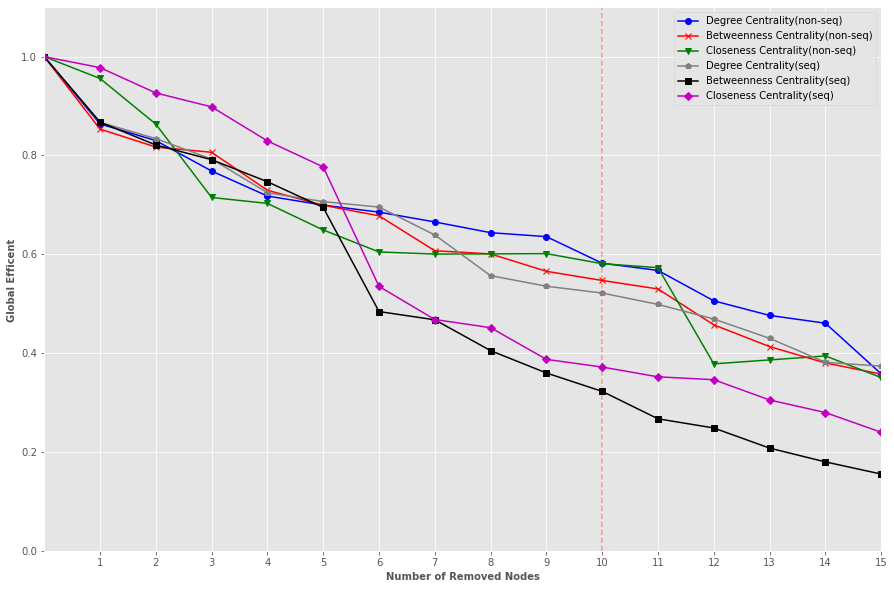

In [36]:
plt.style.use('ggplot')
plt.subplots(figsize=(15,10))
#plt.title('Score After Point Removal(Global Efficent)',fontsize=20,)
plt.xlabel('Number of Removed Nodes',weight="bold",fontsize=10)
plt.ylabel('Global Efficent ',weight="bold",fontsize=10)
plt.xticks(range(1,401))
x=range(0,50)
plt.xlim(xmax=50,xmin=0)
plt.ylim(ymax=1.1,ymin=0)
plt.axvline(x=10,ls = '--',alpha=0.5)
plt.plot(x, global_1,'o-', color='blue',label='Degree Centrality(non-seq)')
plt.plot(x, global_2,'x-', color='red',label='Betweenness Centrality(non-seq)')
plt.plot(x, global_3,'v-', color='green',label='Closeness Centrality(non-seq)')
plt.plot(x, global_4,'p-', color='grey',label='Degree Centrality(seq)')
plt.plot(x, global_5,'s-', color='k',label='Betweenness Centrality(seq)')
plt.plot(x, global_6,'D-', color='m',label='Closeness Centrality(seq)')
plt.legend(loc=1)
plt.show()

In [37]:
print('When 10 nodes are removed from the network, the efficiency decreases by:')
print(str((clustering_1[0]-clustering_1[10])/clustering_1[0]*100)+'%')
print(str((clustering_2[0]-clustering_2[10])/clustering_2[0]*100)+'%')
print(str((clustering_3[0]-clustering_3[10])/clustering_3[0]*100)+'%')
print(str((clustering_4[0]-clustering_4[10])/clustering_4[0]*100)+'%')
print(str((clustering_5[0]-clustering_5[10])/clustering_5[0]*100)+'%')
print(str((clustering_6[0]-clustering_6[10])/clustering_6[0]*100)+'%')

When 10 nodes are removed from the network, the efficiency decreases by:
44.44215085665506%
40.9319644980148%
1.039339612404011%
50.05405481052828%
46.40631724051068%
22.996660747210917%


In [43]:
print('When 10 nodes are removed from the network, the efficiency decreases by:')
print(str((global_1[0]-global_1[10])/clustering_1[0]*100)+'%')
print(str((global_2[0]-global_2[10])/global_2[0]*100)+'%')
print(str((global_3[0]-global_3[10])/global_3[0]*100)+'%')
print(str((global_4[0]-global_4[10])/global_4[0]*100)+'%')
print(str((global_5[0]-global_5[10])/global_5[0]*100)+'%')
print(str((global_6[0]-global_6[10])/global_6[0]*100)+'%')

When 10 nodes are removed from the network, the efficiency decreases by:
42.138252149825604%
45.29922006375562%
41.90485757211576%
47.84667901453991%
67.74114345923469%
62.81535552637993%
